In [3]:
!pip install imageio
!pip install opencv-python
!pip install git+https://github.com/tensorflow/docs


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/tensorflow/docs to c:\users\gupta\appdata\local\temp\pip-req-build-5fgpkle3
  Resolved https://github.com/tensorflow/docs to commit f60f3439d8ab4392aaec1dda88ebfb28b5f7497b
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs 'C:\Users\gupta\AppData\Local\Temp\pip-req-build-5fgpkle3'

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install tensorflow

   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 1.4/331.8 MB 30.3 MB/s eta 0:00:11
   ---------------------------------------- 3.4/331.8 MB 36.2 MB/s eta 0:00:10
    --------------------------------------- 5.1/331.8 MB 40.7 MB/s eta 0:00:09
    --------------------------------------- 7.2/331.8 MB 42.2 MB/s eta 0:00:08
   - -------------------------------------- 8.5/331.8 MB 39.0 MB/s eta 0:00:09
   - -------------------------------------- 10.7/331.8 MB 40.9 MB/s eta 0:00:08
   - -------------------------------------- 11.9/331.8 MB 40.9 MB/s eta 0:00:08
   - -------------------------------------- 13.2/331.8 MB 36.4 MB/s eta 0:00:09
   - -------------------------------------- 15.1/331.8 MB 38.6 MB/s eta 0:00:09
   -- ------------------------------------- 17.1/331.8 MB 38.5 MB/s eta 0:00:09
   -- ------------------------------------- 17.8/331.8 MB 40.9 MB/s eta 0:00:08
   -- ------------------------------------- 19.0/331.8


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install tensorflow_hub

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.7 MB 7.3 MB/s eta 0:00:01
   --------------------- ------------------ 0.9/1.7 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 15.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\gupta\OneDrive\Desktop\projects\Fitness-wingman\venv\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedWriter name=3>
  res = process_handler(cmd, _system_body)
c:\Users\gupta\OneDrive\Desktop\projects\Fitness-wingman\venv\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=4>
  res = process_handler(cmd, _system_body)
c:\Users\gupta\OneDrive\Desktop\projects\Fitness-wingman\venv\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  res = process_handler(cmd, _system_body)


In [7]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display

Matplotlib is building the font cache; this may take a moment.


In [48]:
# Dictionary that maps from joint names to keypoint indices.
KEYPOINT_DICT = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

# Maps bones to a matplotlib color name.
KEYPOINT_EDGE_INDS_TO_COLOR = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def _keypoints_and_edges_for_display(keypoints_with_scores,
                                     height,
                                     width,
                                     keypoint_threshold=0.11):
  """Returns high confidence keypoints and edges for visualization.

  Args:
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    height: height of the image in pixels.
    width: width of the image in pixels.
    keypoint_threshold: minimum confidence score for a keypoint to be
      visualized.

  Returns:
    A (keypoints_xy, edges_xy, edge_colors) containing:
      * the coordinates of all keypoints of all detected entities;
      * the coordinates of all skeleton edges of all detected entities;
      * the colors in which the edges should be plotted.
  """
  keypoints_all = []
  keypoint_edges_all = []
  edge_colors = []
  num_instances, _, _, _ = keypoints_with_scores.shape
  for idx in range(num_instances):
    kpts_x = keypoints_with_scores[0, idx, :, 1]
    kpts_y = keypoints_with_scores[0, idx, :, 0]
    kpts_scores = keypoints_with_scores[0, idx, :, 2]
    kpts_absolute_xy = np.stack(
        [width * np.array(kpts_x), height * np.array(kpts_y)], axis=-1)
    kpts_above_thresh_absolute = kpts_absolute_xy[
        kpts_scores > keypoint_threshold, :]
    keypoints_all.append(kpts_above_thresh_absolute)

    for edge_pair, color in KEYPOINT_EDGE_INDS_TO_COLOR.items():
      if (kpts_scores[edge_pair[0]] > keypoint_threshold and
          kpts_scores[edge_pair[1]] > keypoint_threshold):
        x_start = kpts_absolute_xy[edge_pair[0], 0]
        y_start = kpts_absolute_xy[edge_pair[0], 1]
        x_end = kpts_absolute_xy[edge_pair[1], 0]
        y_end = kpts_absolute_xy[edge_pair[1], 1]
        line_seg = np.array([[x_start, y_start], [x_end, y_end]])
        keypoint_edges_all.append(line_seg)
        edge_colors.append(color)
  if keypoints_all:
    keypoints_xy = np.concatenate(keypoints_all, axis=0)
  else:
    keypoints_xy = np.zeros((0, 17, 2))

  if keypoint_edges_all:
    edges_xy = np.stack(keypoint_edges_all, axis=0)
  else:
    edges_xy = np.zeros((0, 2, 2))
  return keypoints_xy, edges_xy, edge_colors


def draw_prediction_on_image(
    image, keypoints_with_scores, crop_region=None, close_figure=False,
    output_image_height=None):
  """Draws the keypoint predictions on image.

  Args:
    image: A numpy array with shape [height, width, channel] representing the
      pixel values of the input image.
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    crop_region: A dictionary that defines the coordinates of the bounding box
      of the crop region in normalized coordinates (see the init_crop_region
      function below for more detail). If provided, this function will also
      draw the bounding box on the image.
    output_image_height: An integer indicating the height of the output image.
      Note that the image aspect ratio will be the same as the input image.

  Returns:
    A numpy array with shape [out_height, out_width, channel] representing the
    image overlaid with keypoint predictions.
  """
  height, width, channel = image.shape
  aspect_ratio = float(width) / height
  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  # To remove the huge white borders
  fig.tight_layout(pad=0)
  ax.margins(0)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  plt.axis('off')

  im = ax.imshow(image)
  line_segments = LineCollection([], linewidths=(4), linestyle='solid')
  ax.add_collection(line_segments)
  # Turn off tick labels
  scat = ax.scatter([], [], s=60, color='#FF1493', zorder=3)

  (keypoint_locs, keypoint_edges,
   edge_colors) = _keypoints_and_edges_for_display(
       keypoints_with_scores, height, width)

  line_segments.set_segments(keypoint_edges)
  line_segments.set_color(edge_colors)
  if keypoint_edges.shape[0]:
    line_segments.set_segments(keypoint_edges)
    line_segments.set_color(edge_colors)
  if keypoint_locs.shape[0]:
    scat.set_offsets(keypoint_locs)

  if crop_region is not None:
    xmin = max(crop_region['x_min'] * width, 0.0)
    ymin = max(crop_region['y_min'] * height, 0.0)
    rec_width = min(crop_region['x_max'], 0.99) * width - xmin
    rec_height = min(crop_region['y_max'], 0.99) * height - ymin
    rect = patches.Rectangle(
        (xmin,ymin),rec_width,rec_height,
        linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)

  fig.canvas.draw()
  image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  image_from_plot = image_from_plot.reshape(
      fig.canvas.get_width_height()[::-1] + (3,))
  plt.close(fig)
  if output_image_height is not None:
    output_image_width = int(output_image_height / height * width)
    image_from_plot = cv2.resize(
        image_from_plot, dsize=(output_image_width, output_image_height),
         interpolation=cv2.INTER_CUBIC)
  return image_from_plot

def to_gif(images, duration):
  """Converts image sequence (4D numpy array) to gif."""
  imageio.mimsave('./animation.gif', images, duration=duration)
  return embed.embed_file('./animation.gif')

def progress(value, max=100):
  return HTML("""
      <progress
          value='{value}'
          max='{max}',
          style='width: 100%'
      >
          {value}
      </progress>
  """.format(value=value, max=max))

In [47]:
model_name = "movenet_lightning"

if "tflite" in model_name:
  if "movenet_lightning_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/float16/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/float16/4?lite-format=tflite
    input_size = 256
  elif "movenet_lightning_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/int8/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/int8/4?lite-format=tflite
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_path="model.tflite")
  interpreter.allocate_tensors()

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    # TF Lite format expects tensor type of uint8.
    input_image = tf.cast(input_image, dtype=tf.uint8)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], input_image.numpy())
    # Invoke inference.
    interpreter.invoke()
    # Get the model prediction.
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    return keypoints_with_scores

else:
  if "movenet_lightning" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
    input_size = 192
  elif "movenet_thunder" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    model = module.signatures['serving_default']

    # SavedModel format expects tensor type of int32.
    input_image = tf.cast(input_image, dtype=tf.int32)
    # Run model inference.
    outputs = model(input_image)
    # Output is a [1, 1, 17, 3] tensor.
    keypoints_with_scores = outputs['output_0'].numpy()
    return keypoints_with_scores

In [35]:
!pip install ddgs

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/41.6 kB ? eta -:--:--
   ---------------------------------------  41.0/41.6 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 41.6/41.6 kB 666.7 kB/s eta 0:00:00
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached httpcore-1.0.9-py3-none-any.whl (78 kB)
   ---------------------------------------- 0.0/61.8 kB ? eta -:--:--
   ---------------------------------------  61.4/61.8 kB ? eta -:--:--
   ---------------------------------------- 61.8/61.8 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/109.1 kB ? eta -:--:--
   ---------------------------------------- 109.1/109.1 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\gupta\OneDrive\Desktop\projects\Fitness-wingman\venv\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedWriter name=3>
  res = process_handler(cmd, _system_body)
c:\Users\gupta\OneDrive\Desktop\projects\Fitness-wingman\venv\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=4>
  res = process_handler(cmd, _system_body)
c:\Users\gupta\OneDrive\Desktop\projects\Fitness-wingman\venv\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  res = process_handler(cmd, _system_body)


In [37]:
from ddgs import DDGS

results = DDGS().images("python programming", max_results=5)
print(results)

[{'title': 'Python Programming 1920x1080 Wallpapers', 'image': 'https://4kwallpapers.com/images/wallpapers/python-programming-1920x1080-16102.jpg', 'thumbnail': 'https://tse4.mm.bing.net/th/id/OIP.UoAILAx3sCg7Qu36-okV5wHaEK?pid=Api', 'url': 'https://fity.club/lists/2025/Python-Programming-1920X1080-Wallpapers/', 'height': 1080, 'width': 1920, 'source': 'Bing'}, {'title': 'Python Programming Language', 'image': 'https://www.udacity.com/blog/wp-content/uploads/2020/12/Python-Tutorial_Blog-scaled.jpeg', 'thumbnail': 'https://tse1.mm.bing.net/th/id/OIP.3CgXIN-mtxZUOz5IiVMjNgHaE-?pid=Api', 'url': 'https://ar.inspiredpencil.com/pictures-2023/python-programming-language', 'height': 1440, 'width': 2145, 'source': 'Bing'}, {'title': 'Python Programming', 'image': 'https://images.datacamp.com/image/upload/v1646560927/shutterstock_1329434768_bf9003ea47.jpg', 'thumbnail': 'https://tse2.mm.bing.net/th/id/OIP.pwGGcnLnYwjPE5xluQcTpAHaE7?pid=Api', 'url': 'https://ar.inspiredpencil.com/pictures-2023/py

In [39]:
!pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\gupta\OneDrive\Desktop\projects\Fitness-wingman\venv\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedWriter name=3>
  res = process_handler(cmd, _system_body)
c:\Users\gupta\OneDrive\Desktop\projects\Fitness-wingman\venv\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=4>
  res = process_handler(cmd, _system_body)
c:\Users\gupta\OneDrive\Desktop\projects\Fitness-wingman\venv\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  res = process_handler(cmd, _system_body)


In [59]:
# ...existing code...
from ddgs import DDGS
import os
import time
import requests
from urllib.parse import unquote, urlsplit
from tqdm import tqdm

def ensure_dir(path):
    os.makedirs(path, exist_ok=True)

def guess_ext_from_url(url):
    path = urlsplit(url).path
    name = unquote(os.path.basename(path))
    ext = os.path.splitext(name)[1]
    return ext if ext and len(ext) <= 5 else ""

def extract_url(item):
    # common keys returned by different ddgs versions
    for k in ("image","img","thumbnail","url","href","src","image_url"):
        v = item.get(k) if isinstance(item, dict) else None
        if v:
            # sometimes value is dict or list
            if isinstance(v, dict):
                # try common subkeys
                for sk in ("url","src","image","thumbnail"):
                    if sk in v and isinstance(v[sk], str):
                        return v[sk]
                # fallback to first string value
                for val in v.values():
                    if isinstance(val, str):
                        return val
            elif isinstance(v, str):
                return v
    # fallback: sometimes entire item is a url string
    if isinstance(item, str):
        return item
    return None

def download_from_ddgs(query, out_dir, max_results=100, delay=0.2, timeout=10):
    ensure_dir(out_dir)
    ddgs = DDGS()
    results = list(ddgs.images(query, max_results=max_results))
    downloaded = 0
    for i, item in enumerate(tqdm(results, desc=query, total=len(results))):
        url = extract_url(item)
        if not url:
            continue
        ext = guess_ext_from_url(url) or ".jpg"
        filename = f"{i+1:05d}{ext}"
        outpath = os.path.join(out_dir, filename)
        try:
            resp = requests.get(url, stream=True, timeout=timeout, headers={"User-Agent":"Mozilla/5.0"})
            if resp.status_code == 200 and "image" in (resp.headers.get("content-type","")):
                with open(outpath, "wb") as f:
                    for chunk in resp.iter_content(1024):
                        if chunk:
                            f.write(chunk)
                downloaded += 1
        except Exception:
            # skip on any download error
            continue
        time.sleep(delay)
    return downloaded

# Example usage
out = r".\research\workout_images_ddgs"
count = download_from_ddgs("single person working out in the gym alone", out_dir=out, max_results=5, delay=0.2)
print(f"Downloaded {count} images to {out}")
# ...existing code...

single person working out in the gym alone: 100%|██████████| 5/5 [00:08<00:00,  1.72s/it]

Downloaded 5 images to .\research\workout_images_ddgs


In [62]:
# ...existing code...
def draw_prediction_on_image(
    image, keypoints_with_scores, crop_region=None, close_figure=False,
    output_image_height=None):
  """Draws the keypoint predictions on image."""
  from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

  height, width, channel = image.shape
  aspect_ratio = float(width) / height
  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  # To remove the huge white borders
  fig.tight_layout(pad=0)
  ax.margins(0)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  plt.axis('off')

  im = ax.imshow(image)
  line_segments = LineCollection([], linewidths=(4), linestyle='solid')
  ax.add_collection(line_segments)
  scat = ax.scatter([], [], s=60, color='#FF1493', zorder=3)

  (keypoint_locs, keypoint_edges,
   edge_colors) = _keypoints_and_edges_for_display(
       keypoints_with_scores, height, width)

  if keypoint_edges.shape[0]:
    line_segments.set_segments(keypoint_edges)
    line_segments.set_color(edge_colors)
  if keypoint_locs.shape[0]:
    scat.set_offsets(keypoint_locs)

  if crop_region is not None:
    xmin = max(crop_region['x_min'] * width, 0.0)
    ymin = max(crop_region['y_min'] * height, 0.0)
    rec_width = min(crop_region['x_max'], 0.99) * width - xmin
    rec_height = min(crop_region['y_max'], 0.99) * height - ymin
    rect = patches.Rectangle(
        (xmin,ymin),rec_width,rec_height,
        linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)

  # Use Agg canvas and buffer_rgba() for a robust RGB image extraction.
  canvas = FigureCanvas(fig)
  canvas.draw()
  buf = canvas.buffer_rgba()  # bytes in RGBA order
  w, h = canvas.get_width_height()
  arr = np.frombuffer(buf, dtype=np.uint8).reshape((h, w, 4))
  # drop alpha channel
  image_from_plot = arr[:, :, :3]
  # Matplotlib/Cairo may produce RGB order already. If colors look wrong, try arr[:, :, ::-1]
  plt.close(fig)

  if output_image_height is not None:
    output_image_width = int(output_image_height / height * width)
    image_from_plot = cv2.resize(
        image_from_plot, dsize=(output_image_width, output_image_height),
         interpolation=cv2.INTER_CUBIC)
  return image_from_plot
# ...existing code...

In [67]:
# Load the input image.
image_path = r'C:\Users\gupta\OneDrive\Desktop\projects\Fitness-wingman\research\research\workout_images_ddgs\00002.jpg'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image)

In [74]:
%load_ext autoreload
%autoreload 2
from research.run_pose_on_folder import process_folder

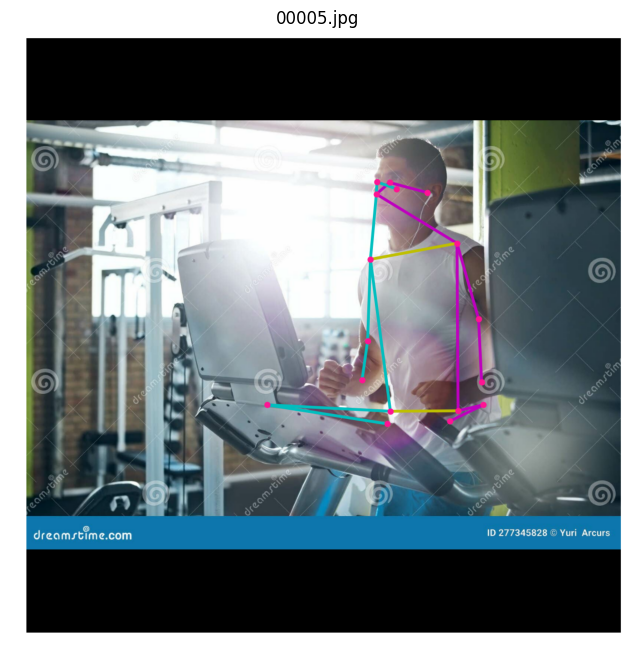

In [75]:
process_folder(r".\research\workout_images_ddgs")